In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df= pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,ID,Age,Gender,Department,Years_of_Experience,Education_Level,Salary,Bonus,Performance_Score,Region
0,0,1,60,Female,Marketing,4.0,Bachelors,114065.0,6514,5,East
1,1,2,50,Female,Engineering,25.0,PhD,49268.0,8432,3,East
2,2,3,36,Female,Finance,14.0,Bachelors,52185.0,6474,8,North
3,3,4,64,Female,Finance,9.0,Bachelors,103704.0,7892,6,East
4,4,5,29,Male,Engineering,26.0,Bachelors,79099.0,5561,3,East


 # Data Cleaning tasks:

In [67]:
df.dtypes

Unnamed: 0               int64
ID                       int64
Age                      int64
Gender                  object
Department              object
Years_of_Experience    float64
Education_Level         object
Salary                 float64
Bonus                    int64
Performance_Score        int64
Region                  object
dtype: object

In [68]:
df.drop(columns = "Unnamed: 0", inplace= True)

In [69]:
df.isnull().sum()

ID                     0
Age                    0
Gender                 0
Department             0
Years_of_Experience    1
Education_Level        0
Salary                 1
Bonus                  0
Performance_Score      0
Region                 0
dtype: int64

In [70]:
df[df.duplicated()]

,ID,Age,Gender,Department,Years_of_Experience,Education_Level,Salary,Bonus,Performance_Score,Region


In [71]:
df["Years_of_Experience"] = df["Years_of_Experience"].fillna(df["Years_of_Experience"].mode()[0])

In [72]:
df["Salary"] = df["Salary"].fillna(df["Salary"].mode()[0])

In [73]:
# Convert the 'Gender' column to a numerical format (e.g., Male=1, Female=0).
df["Gender"].replace({"Male":1,"Female":0},inplace=True)
df["Gender"]=df["Gender"].astype(int)
df.head()

,ID,Age,Gender,Department,Years_of_Experience,Education_Level,Salary,Bonus,Performance_Score,Region
0,1,60,0,Marketing,4.0,Bachelors,114065.0,6514,5,East
1,2,50,0,Engineering,25.0,PhD,49268.0,8432,3,East
2,3,36,0,Finance,14.0,Bachelors,52185.0,6474,8,North
3,4,64,0,Finance,9.0,Bachelors,103704.0,7892,6,East
4,5,29,1,Engineering,26.0,Bachelors,79099.0,5561,3,East


# Matplotlib

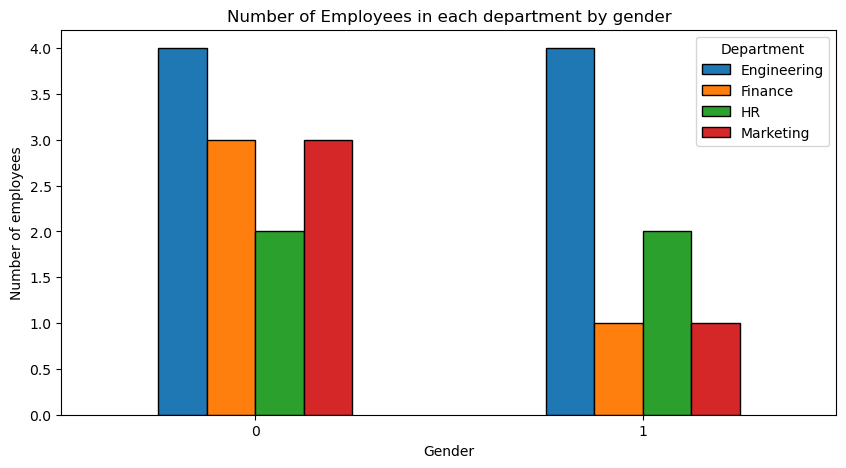

In [117]:
#Create a bar chart to show the number of employees in each department by gender.

emp = df.groupby(['Gender', 'Department']).size().unstack()
emp.plot(kind="bar",figsize=(10, 5),edgecolor="black")
plt.title("Number of Employees in each department by gender")
plt.xlabel("Gender")
plt.ylabel("Number of employees")
plt.xticks(rotation=0)
plt.legend(title="Department")
plt.show()



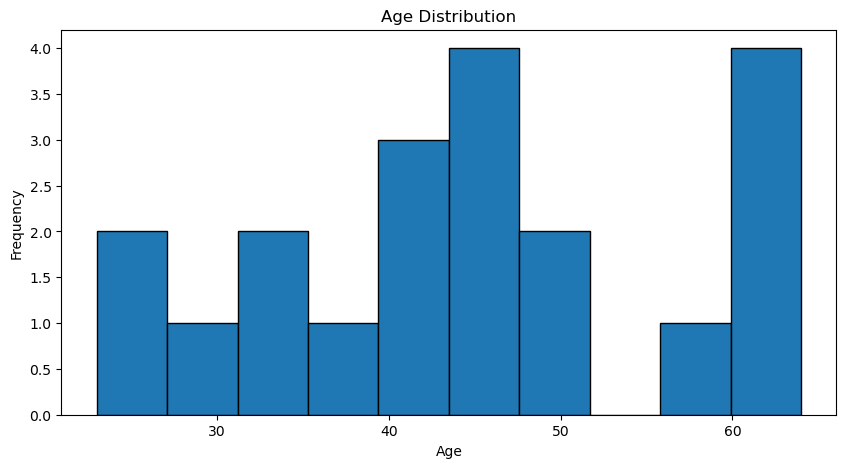

In [116]:
#Ploting a histogram to show the distribution of ages in the dataset
plt.figure(figsize=(10, 5))
plt.hist(df["Age"],bins=10,edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

<Figure size 1000x500 with 0 Axes>

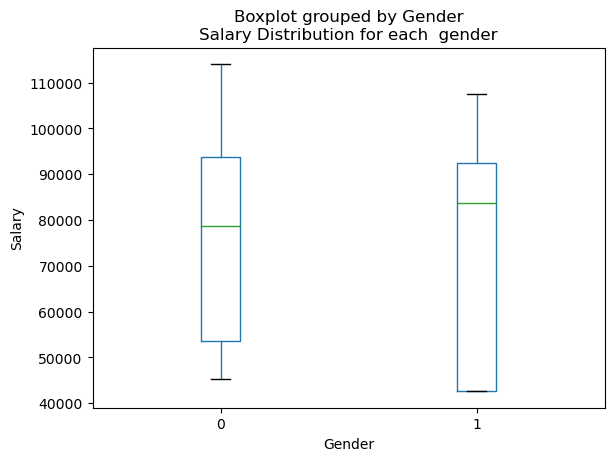

In [115]:
#Creating a box plot to visualize the salary distribution for each gender.
plt.figure(figsize=(10,5))
df.boxplot(column='Salary', by='Gender', grid=False)
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Salary Distribution for each  gender")
plt.show()


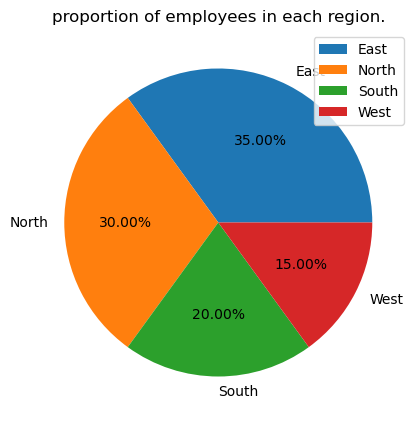

In [114]:
#Ploting a pie chart to show the proportion of employees in each region.

region= df["Region"].value_counts()
plt.figure(figsize=(12,5))
plt.pie(region,labels=region.index,autopct='%1.2f%%')
plt.title("proportion of employees in each region.")
plt.legend()
plt.show()


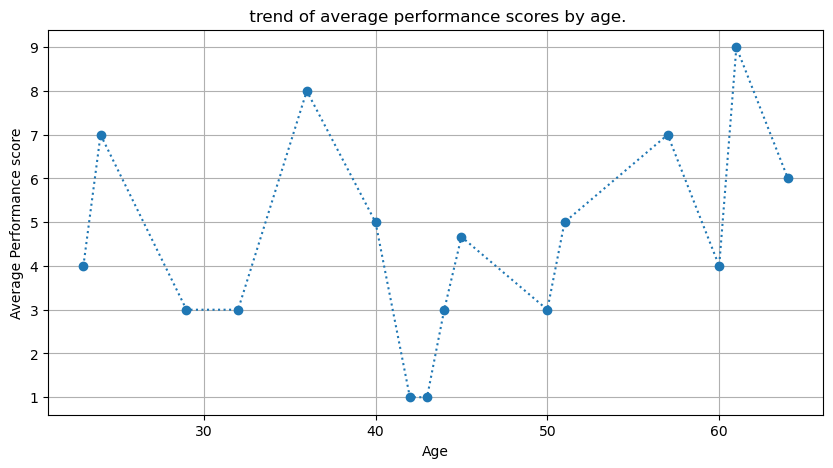

In [112]:
#Creating a line plot to show the trend of average performance scores by age.
avg_score = df.groupby("Age")["Performance_Score"].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_score.index,avg_score.values,marker="o" ,linestyle = 'dotted')
plt.title(" trend of average performance scores by age.")
plt.xlabel("Age")
plt.ylabel("Average Performance score")
plt.grid(True)
plt.show()

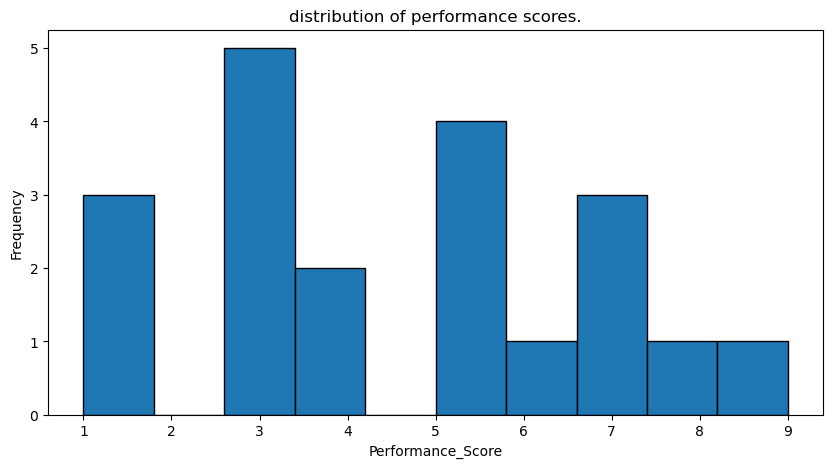

In [111]:
#Create a histogram to show the distribution of performance scores.
plt.figure(figsize=(10,5))
plt.hist(df["Performance_Score"],bins=10,edgecolor="black")
plt.xlabel("Performance_Score")
plt.ylabel("Frequency")
plt.title("distribution of performance scores.")
plt.show()

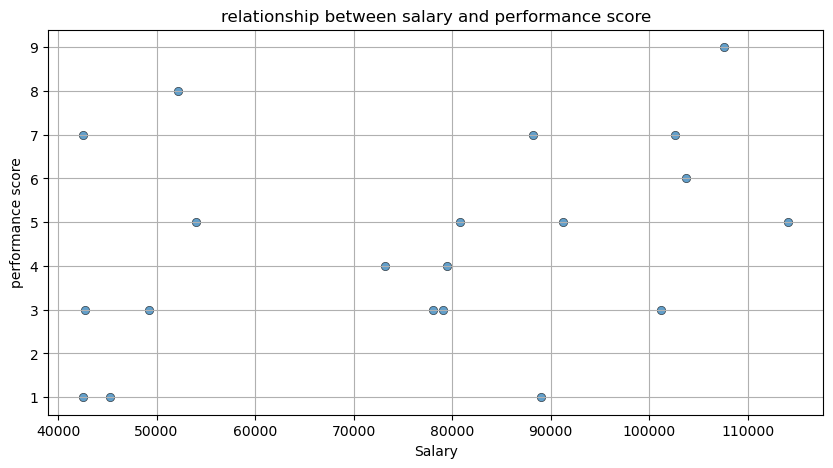

In [108]:
# Plot a scatter plot to show the relationship between salary and performance score.
plt.figure(figsize=(10,5))
plt.scatter(df["Salary"],df["Performance_Score"],alpha=0.7,edgecolors="black",linewidths=0.5)
plt.title("relationship between salary and performance score")
plt.xlabel("Salary")
plt.ylabel("performance score")
plt.grid(True)
plt.show()


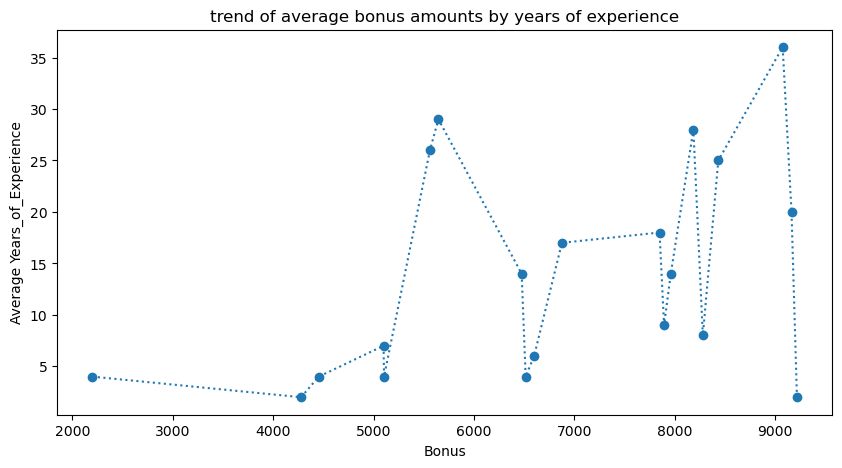

In [109]:
#Create a line plot to show the trend of average bonus amounts by years of experience.
avg_bonus = df.groupby("Bonus")["Years_of_Experience"].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_bonus.index,avg_bonus.values,marker="o",linestyle=":")
plt.title("trend of average bonus amounts by years of experience")
plt.xlabel("Bonus")
plt.ylabel("Average Years_of_Experience")
plt.show()


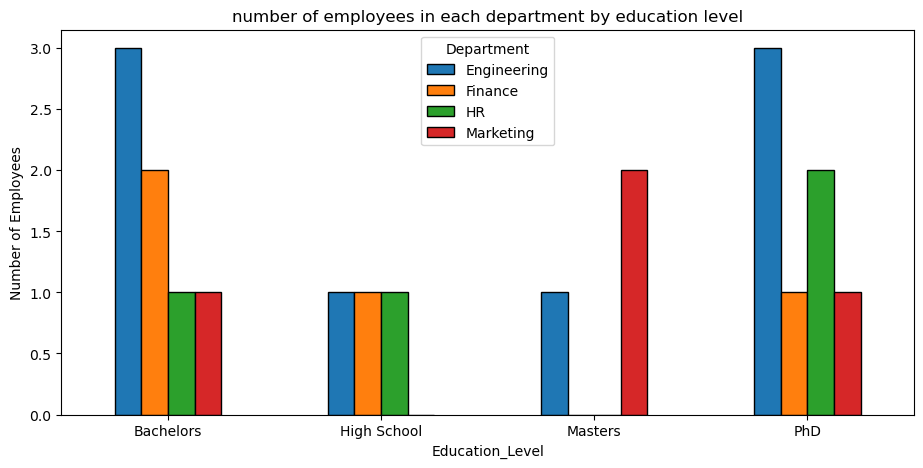

In [110]:
#Plot a bar chart to show the number of employees in each department by education level.
emp=df.groupby(["Education_Level","Department"]).size().unstack()
emp.plot(kind="bar",figsize=(11,5),edgecolor="black")
plt.title("number of employees in each department by education level")
plt.xlabel("Education_Level")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.legend(title="Department")
plt.show()